# **Import Library**



---



In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import csv
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Pre-Prosessing Data**


---



In [ ]:
def preprocess_text(content):

  content = content.lower()

  result = content.split()

  content = [word for word in result if word not in stop_words]

  content = ' '.join(content)

  return content

In [ ]:
preprocess_text('Saya sebagai cs dan driver Di cs pesen makanan cari drivernya yg gacor2 jd lama pilih2 yg jauh pun jadi itu pun lama Di driver sehari order cuma di kasih 1 biji gmna mau nafkahin istri maaf kalo sy beralih dlu')

'cs driver cs pesen makanan cari drivernya yg gacor2 jd pilih2 yg driver sehari order kasih 1 biji gmna nafkahin istri maaf kalo sy beralih dlu'

In [ ]:
def process_text(file_name):
  content = []
  reaksi = []

  with open("/content/drive/MyDrive/GEMASTIK -DATMIN/data_cleaned.csv", 'r') as csvfile:
      reader = csv.reader(csvfile, delimiter=',')
      next(reader)
      for row in reader:
            content.append(preprocess_text(row[0]))
            reaksi.append(preprocess_text(row[1]))

  return content, reaksi

In [ ]:
content, reaksi = process_text('/content/drive/MyDrive/GEMASTIK -DATMIN/data_cleaned.csv')
print('Content:', content)
print('Reaksi:', reaksi)

Content: ['akun gopay blok', 'lambat bosssku apk gojek gk kaya', 'sih kemarin sy buka aplikasi gojek kasih bintang 2 kalo normal sy kasih bintang 7', 'download gojek hape trus ditop u gopay transaksi dialfamart transaksi bloked transaksilaporan pusat bantuan gak lainlama gojek dikelola tokopedia udah nyimpangapa gojek anak bangsa tokopedia', 'mantap', 'bagus', 'coba', 'ok', 'gimana kak pin salah udah ubah salah', 'biar aman pakai gojek uninstal biar aman', 'kumpulan driver sampah', 'gojek ngga susah bgt dapet driver gofood ongkirnya mahal bgt mohon diperbaiki', 'ok mantap', 'verry good', 'aplikasi asuuu main gx ais hrs aplikasi lgi mending pake aplikasi akurat', 'misi gojek jago gak syarat penyelesaiannya udah selesaikan misi membeli voucher gpc 50k gak dianggap selesai', 'aplikasi nya good job banyakin lagih yah promo nya', 'mantap', 'pelayanannya bagus', 'gak', 'bagus', 'go food ngga promo ongkirnya mahal aja', 'gojek akhir2 ngeselin driverny suka cancel seenakny', 'bintang 1 ngikut 

In [ ]:
# Jumlah kata dalam kosakata
vocab_size = 10000  # Ganti dengan ukuran kosakata yang sesuai

# Panjang input yang akan diberikan kepada model (misalnya, jumlah token dalam setiap teks)
max_length = 100  # Ganti sesuai dengan panjang teks maksimum yang diharapkan

# Dimensi vektor embedding
embedding_dim = 64  # Ganti dengan dimensi embedding yang diinginkan

# Maximum length dari sebuah padded sequences
max_length = 16

training_split = .8

In [ ]:
def train_val_split(content, reaksi, training_split):

    # menghitung jumlah content yang akan digunakan untuk pelatihan (harus bilangan bulat)
    train_size = int(len(content)*training_split)

    # memisahkan content dan reaksi menjadi bagian pelatihan/validasi
    train_content = content[:train_size]
    train_reaksi = reaksi[:train_size]

    validation_content = content[train_size:]
    validation_reaksi = reaksi[train_size:]

    return train_content, validation_content, train_reaksi, validation_reaksi

In [ ]:
train_content, validation_content, train_reaksi, validation_reaksi = train_val_split(content, reaksi, 0.8)

In [ ]:
# Parameter untuk padding dan OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# inisialisasi Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# membuat kamus indeks kata
tokenizer.fit_on_texts(train_content)
word_index = tokenizer.word_index

# membuat pad sequence pelatihan
training_sequences = tokenizer.texts_to_sequences(train_content)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# membuat pad sequences test
testing_sequences = tokenizer.texts_to_sequences(validation_content)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# memngubah reaksi dari tipe data string ke integer
label_encoder = LabelEncoder()
training_labels = label_encoder.fit_transform(train_reaksi)
validation_labels = label_encoder.transform(validation_reaksi)

# mengubah label ke array
training_labels = np.array(training_labels)
validation_labels = np.array(validation_labels)

In [ ]:
print(f"Panjang data train: {len(train_content)}")
print(f"Panjang data test: {len(validation_content)}")
print(f"Panjang data train reaksi: {len(train_reaksi)}")
print(f"Panjang data test reaksi: {len(validation_reaksi)}")

Panjang data train: 7998
Panjang data test: 2000
Panjang data train reaksi: 7998
Panjang data test reaksi: 2000


#  **Training and Test Model**


---



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 64)            640000    
                                                                 
 bidirectional (Bidirection  (None, 16, 128)           66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2

In [ ]:
num_epochs = 50
BATCH_SIZE = 32
# callback
# Train the model
history_lstm = model.fit(training_padded, training_labels, epochs=num_epochs, batch_size=BATCH_SIZE, validation_data=(testing_padded, validation_labels), callbacks=[callbacks], validation_split = 0.2)

Epoch 1/50
250/250 [==============================] - 17s 43ms/step - loss: 0.6127 - accuracy: 0.6652 - val_loss: 0.4950 - val_accuracy: 0.7325
Epoch 2/50
250/250 [==============================] - 6s 24ms/step - loss: 0.4976 - accuracy: 0.6777 - val_loss: 0.4114 - val_accuracy: 0.8440
Epoch 3/50
250/250 [==============================] - 4s 14ms/step - loss: 0.4512 - accuracy: 0.7516 - val_loss: 0.3771 - val_accuracy: 0.8440
Epoch 4/50
250/250 [==============================] - 3s 13ms/step - loss: 0.4127 - accuracy: 0.8336 - val_loss: 0.3560 - val_accuracy: 0.8455
Epoch 5/50
250/250 [==============================] - 3s 13ms/step - loss: 0.3820 - accuracy: 0.8708 - val_loss: 0.3309 - val_accuracy: 0.8615
Epoch 6/50
250/250 [==============================] - 4s 17ms/step - loss: 0.3484 - accuracy: 0.8833 - val_loss: 0.3048 - val_accuracy: 0.8710
Epoch 7/50
250/250 [==============================] - 3s 13ms/step - loss: 0.3162 - accuracy: 0.8890 - val_loss: 0.2951 - val_accuracy: 0.873

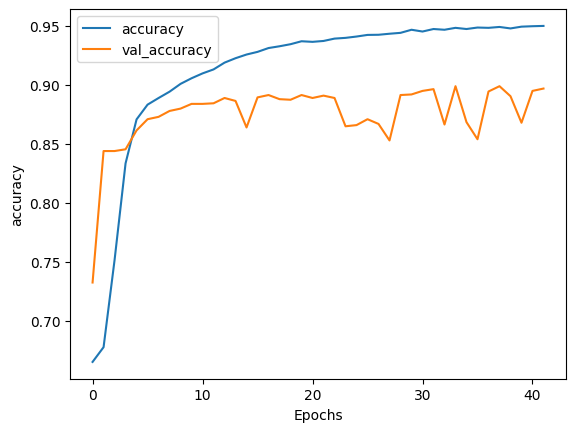

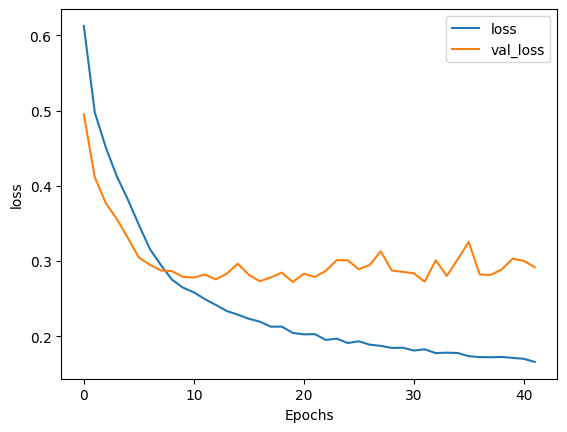

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

# **Model Evaluation**


---



In [ ]:
X_test = testing_padded # sequences dari data test
y_test = validation_labels # labels dari data test

# Evaluasi model pada test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

63/63 [==============================] - 1s 8ms/step - loss: 0.2919 - accuracy: 0.8970
Test Loss: 0.2919132113456726
Test Accuracy: 0.8970000147819519


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

63/63 [==============================] - 2s 4ms/step


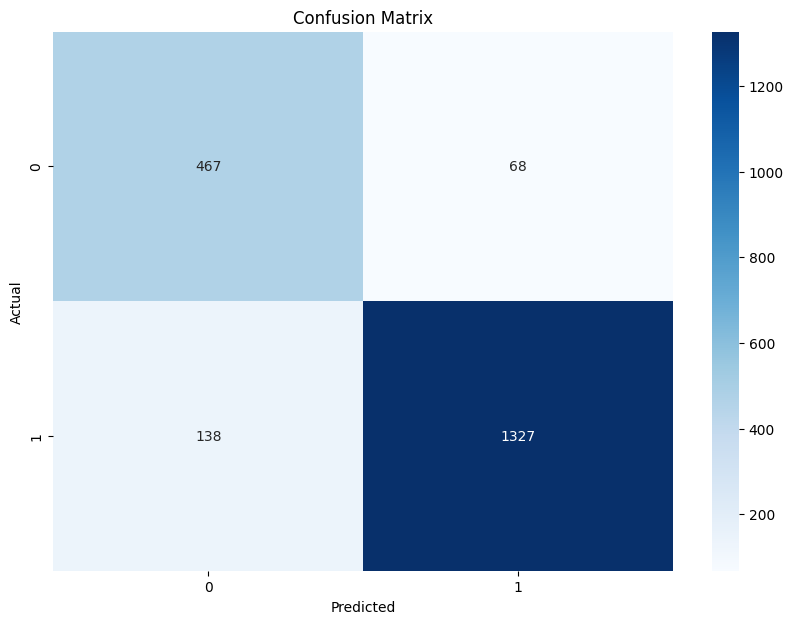

              precision    recall  f1-score   support

     negatif       0.77      0.87      0.82       535
     positif       0.95      0.91      0.93      1465

    accuracy                           0.90      2000
   macro avg       0.86      0.89      0.87      2000
weighted avg       0.90      0.90      0.90      2000



In [ ]:
from sklearn.metrics import  confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [ ]:
new_texts = [
    'gimanasih ini caranya kok gabisa bisa dari tadi'
]

# Preprocessing teks baru
sequences = tokenizer.texts_to_sequences(new_texts)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=16, padding='post')

# Prediksi dengan model
y_probs = model.predict(padded_sequences)

# Menentukan threshold
threshold = 0.4  # Sesuaikan threshold sesuai kebutuhan
y_pred = (y_probs > threshold).astype("int32")

# Dekode hasil prediksi menggunakan LabelEncoder
predicted_labels = label_encoder.inverse_transform(y_pred.flatten())

# Menampilkan hasil prediksi
for text, label in zip(new_texts, predicted_labels):
    print(f'Teks: {text} --> Prediksi: {label}')

1/1 [==============================] - 0s 44ms/step
Teks: gimanasih ini caranya kok gabisa bisa dari tadi --> Prediksi: negatif
